In [ ]:
pip install bambi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.1/44.1 KB 4.0 MB/s eta 0:00:00


In [ ]:
import scipy
from scipy.stats import multivariate_normal
from scipy.stats import norm as univariate_normal


from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

from IPython.display import display, clear_output

import functools

import jax
import jax.numpy as jnp
from jax import random
from jax import make_jaxpr
from jax.config import config
from jax import value_and_grad
from jax import grad, vmap, pmap, jit
import jax.tree_util as jtu

import optax
from flax import linen as nn
from flax.training import train_state
import flax

from typing import Any, Callable, Sequence, Optional
import sympy
from sympy import Matrix

from dataclasses import dataclass

In [ ]:
from jax.config import config
config.update("jax_enable_x64", True)

### Define True Model Function and Sample Data



$ y = 2t + 1 $

In [ ]:
ndata = 200 #number of known data points

t0 = -1.0
t1 = 1.0
t = jnp.linspace(t0, t1, ndata)

def true_fun(t):
    return jnp.array([2*t + 1])

In [ ]:
stdev = 1

true_y = true_fun(t).squeeze() 
true_y = true_y + np.random.normal(scale=stdev, size=true_y.shape)

Text(0, 0.5, 'y')

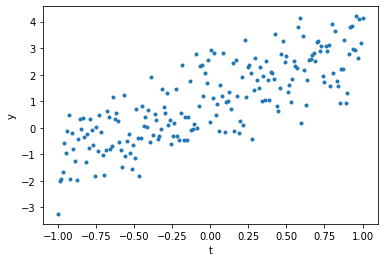

In [ ]:
#plot the training data
plt.plot(t, true_y, '.')
plt.xlabel('t')
plt.ylabel('y')

Below Code Referenced from https://bambinos.github.io/bambi/notebooks/getting_started.html

In [ ]:
import bambi as bmb
import pandas as pd

# Create a DataFrame with the data
data = pd.DataFrame({'t': t, 'y': true_y})

# Define the model formula and prior
formula = 'y ~ t'
prior = {'Intercept': bmb.Prior("Normal", mu=0, sigma=100000000),
         't': bmb.Prior("Normal", mu=0, sigma=100000000)}

# Define the model
model = bmb.Model(data=data, formula=formula, priors=prior)

# Fit the model
results = model.fit(method='mcmc', draws=1000, chains=4)

/usr/local/lib/python3.9/dist-packages/bambi/models.py:282: FutureWarning: the method argument has been deprecated, please use inference_method
  warnings.warn(


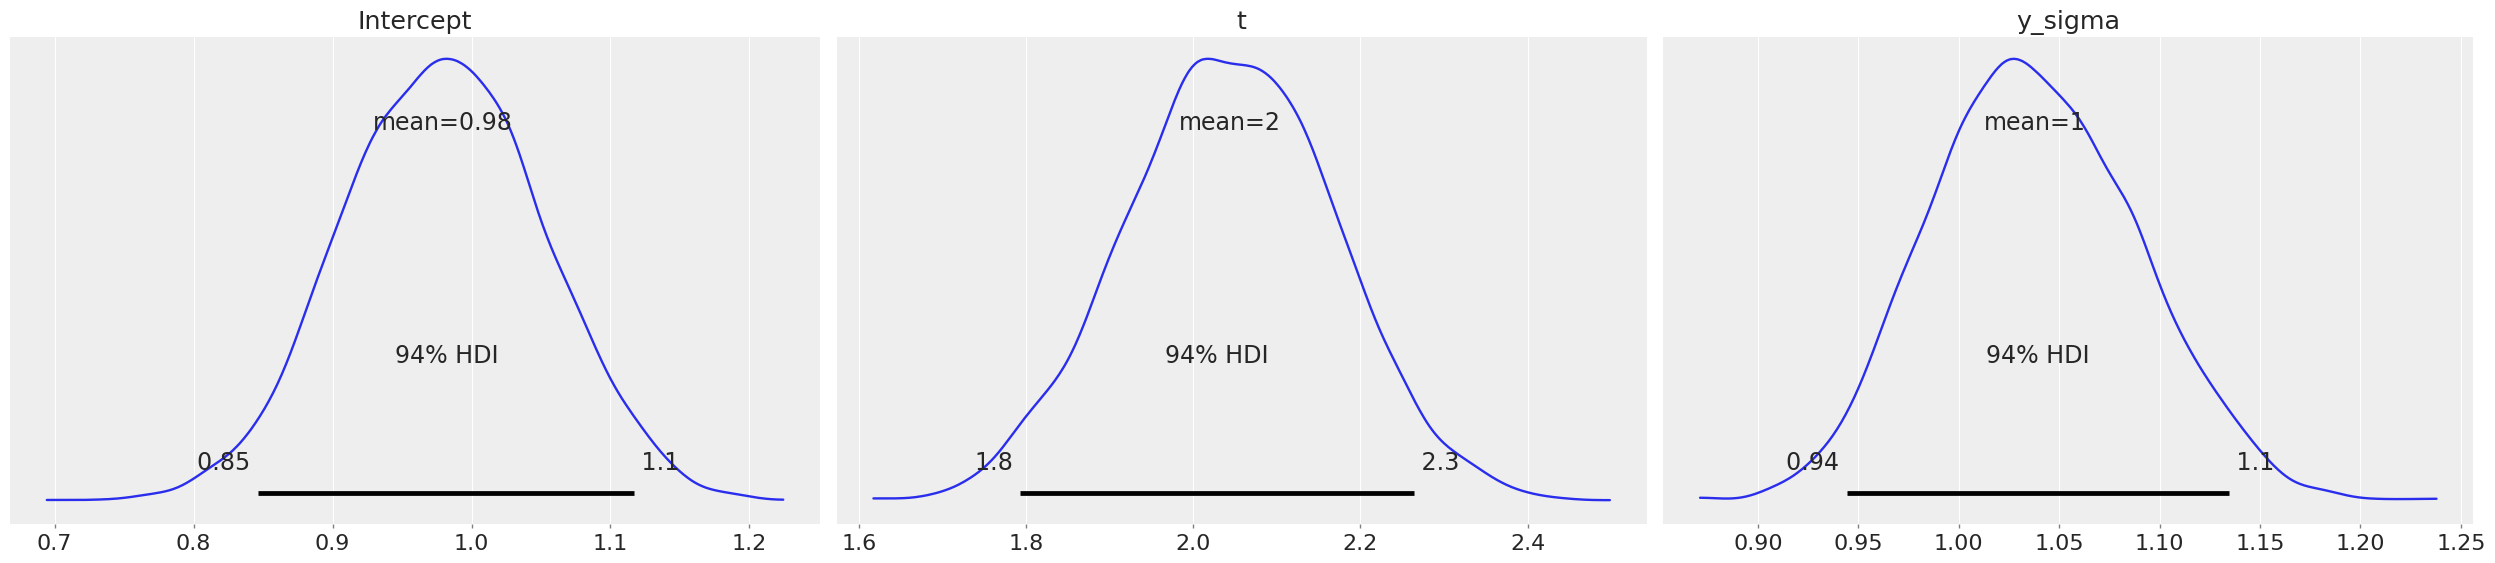

In [ ]:
az.style.use("arviz-darkgrid")
with my_model:
  az.plot_posterior(results,textsize=16)

In [ ]:
# Posterior Distribution Summary:
az.summary(results)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,0.979,0.073,0.847,1.117,0.001,0.001,6427.0,2562.0,1.0
t,2.043,0.126,1.792,2.265,0.002,0.001,5907.0,2992.0,1.0
y_sigma,1.038,0.052,0.944,1.134,0.001,0.000,5472.0,3029.0,1.0


In [ ]:
model.backend.model

Here's what we used for our distributions:

 \begin{array}{rcl}
            \text{y_sigma} &\sim & \operatorname{HalfStudentT}(4,~1.57)\\\text{Intercept} &\sim & \operatorname{N}(0,~1e+08)\\\text{t} &\sim & \operatorname{N}(0,~1e+08)\\\text{y} &\sim & \operatorname{N}(f(\text{Intercept},~\text{t}),~\text{y_sigma})
            \end{array}